In [19]:
import os
import math
import random
import cytnx as cy
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [20]:
## Basic parameter
cnames = {                        
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chocolate':            '#D2691E',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'orangered':            '#FF4500',
'orchid':               '#DA70D6'}
carr = []
for cmap in cnames.keys():                          ## color array
    carr.append(cmap)
marr = ['o-', 'x-', '^-', 's-', 'p-', '*-', 'h-']   ## marker array

# Solving 1D Ising Model throuh Transfer Matrix Method

## Exact vs Numerical 

## Exact Solution

### $\lambda_+ = \exp{\beta J}*\{\cosh(\beta B) + \sqrt{\sinh{\beta B}^2+\exp{-4\beta J}}\}$

In [21]:
def lamda_p(temperature, J, B):
    beta = 1/temperature
    return math.exp(beta*J)*( math.cosh(beta*B) + math.sqrt((math.sinh(beta*B))**2 + math.exp(-4*beta*J)) )

### $\lambda_- = \exp{\beta J}*\{\cosh(\beta B) - \sqrt{\sinh{\beta B}^2+\exp{-4\beta J}}\}$

In [22]:
def lamda_n(temperature, J, B):
    beta = 1/temperature
    return math.exp(beta*J)*( math.cosh(beta*B) - math.sqrt((math.sinh(beta*B))**2 + math.exp(-4*beta*J)) )

## Transfer Matrix
### $T = \begin{pmatrix} \exp{\beta (J+B)}&\exp{\beta (-JB)}\\\exp{\beta (JB)}&\exp{\beta (J-B)} \end{pmatrix}$


In [23]:
def T(temperature, J, B):
    beta = 1/temperature
    return np.array([[math.exp(beta*(J+B)),math.exp(-beta*(J))],[math.exp(-beta*(J)),math.exp(beta*(J-B))]])

[]

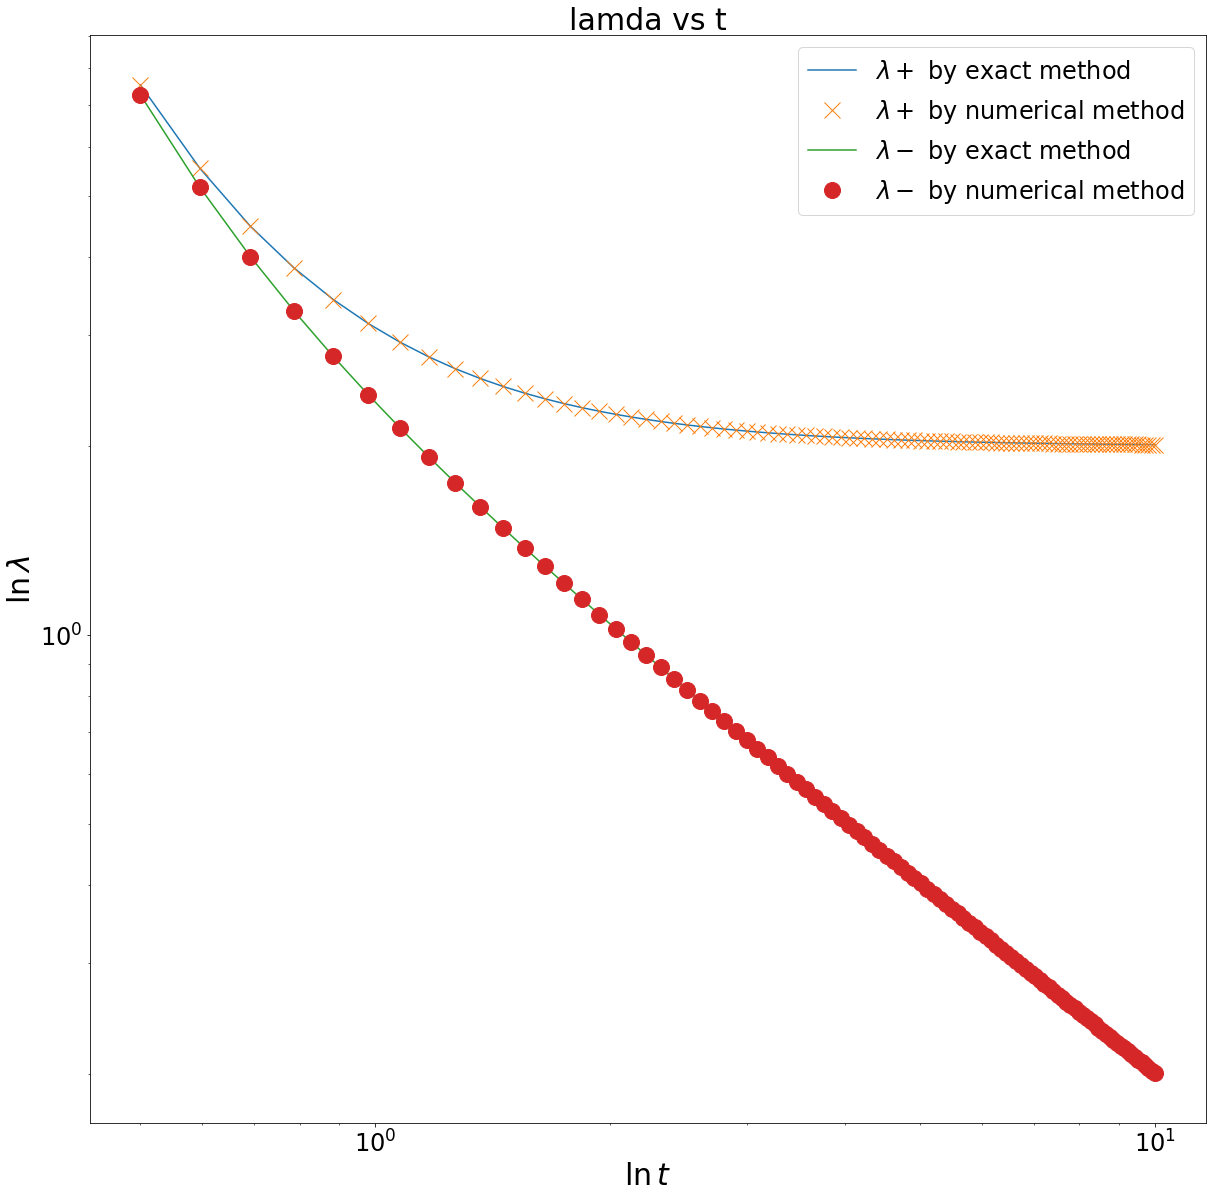

In [24]:
temperature = np.linspace(0.5,10,100)
# print(temperature)
lambda_p_numerical = []
lambda_n_numerical = []
for t in temperature:
    eigcvle, eigfn = np.linalg.eig(T(t, 1, 0))
    lambda_p_numerical.append(eigcvle[0])
    lambda_n_numerical.append(eigcvle[1])


plt.figure(figsize=(20,20))
plt.title("lamda vs t", fontsize=30)
y=[lamda_p(i, 1, 0) for i in temperature]
plt.plot(temperature, y, label = "$\lambda+$ by exact method")
plt.plot(temperature, lambda_p_numerical, 'x', label = "$\lambda+$ by numerical method" ,markersize=16)
y=[lamda_n(i, 1, 0) for i in temperature]
plt.plot(temperature, y, label = "$\lambda-$ by exact method")
plt.plot(temperature, lambda_n_numerical, 'o', label = "$\lambda-$ by numerical method" ,markersize=16)
plt.legend(loc="best",fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("$\ln t$",fontsize=30)
plt.ylabel("$\ln{\lambda}$", fontsize=30)
plt.loglog()

## 2D Ising Model through transfer Matrix Method

### Transfer Matrix

In [25]:
def twoD(temperature, J, B):
    beta = 1/temperature
    
    V1 = np.zeros((4,4))

    V1[0,0] = math.exp( 4*beta*J + 2*beta*B )
    V1[0,1] = math.exp( beta*B )
    V1[0,2] = math.exp( beta*B )
    V1[0,3] = 1
    V1[1,0] = math.exp( beta*B )
    V1[1,1] = 1
    V1[1,2] = math.exp( -4*beta*J)
    V1[1,3] = math.exp( -beta*B )
    V1[2,0] = math.exp( beta*B )
    V1[2,1] = math.exp( -4*beta*J)
    V1[2,2] = 1
    V1[2,3] = math.exp( -beta*B )
    V1[3,0] = 1
    V1[3,1] = math.exp( -beta*B )
    V1[3,2] = math.exp( -beta*B )
    V1[3,3] = math.exp( 4*beta*J - 2*beta*B )
    return V1

[]

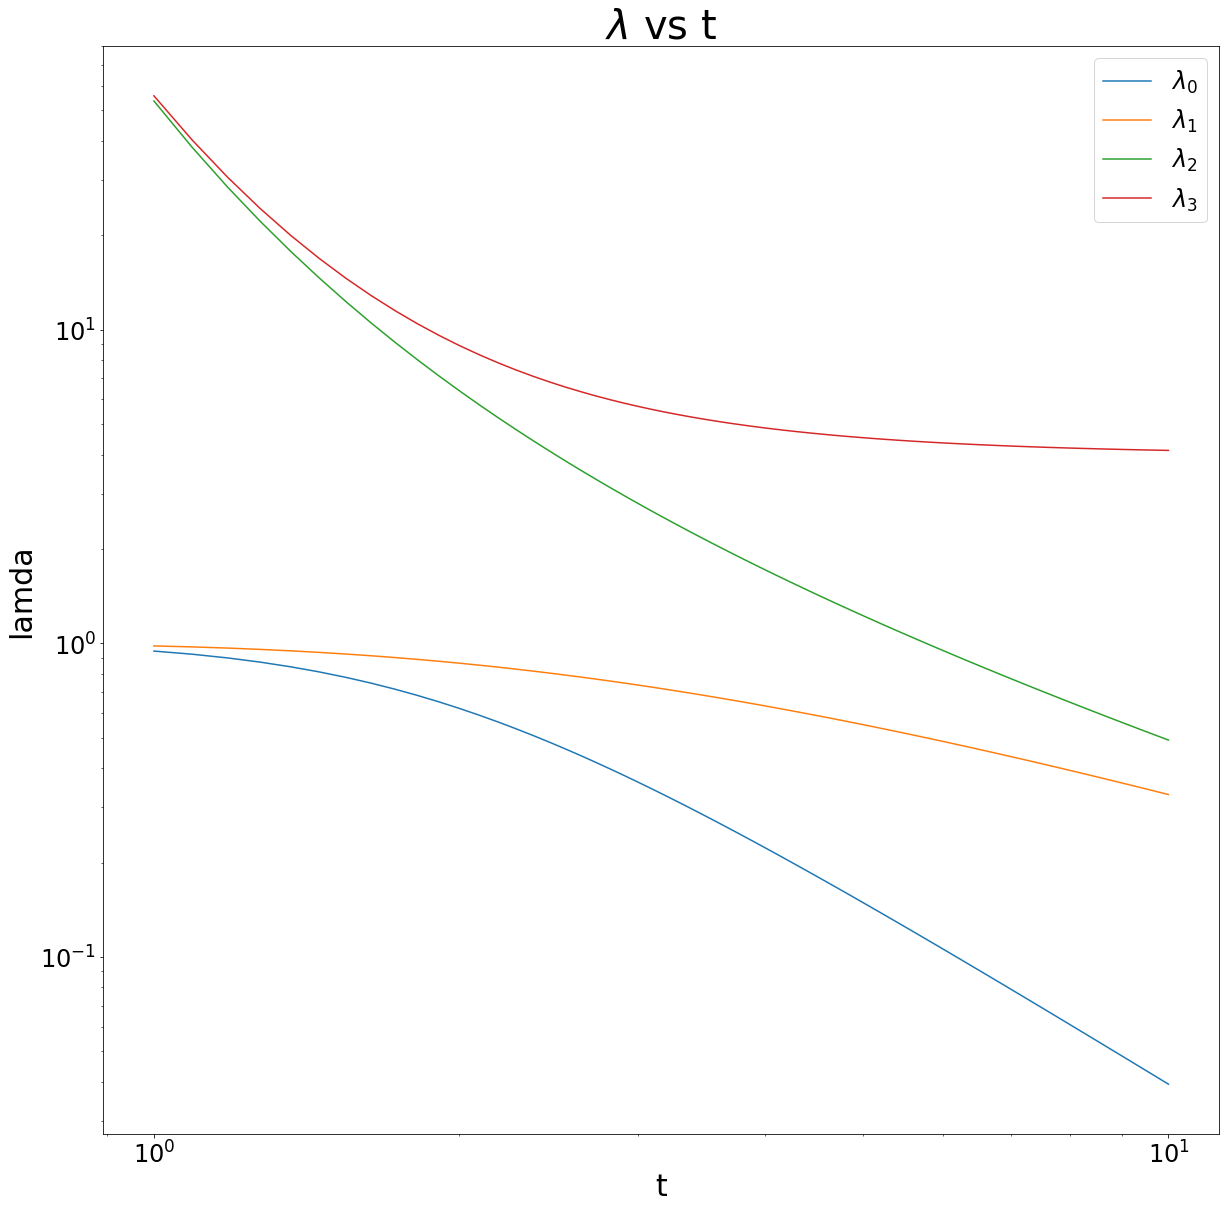

In [26]:
plt.figure(figsize=(20,20))
plt.title("$\lambda$ vs t",fontsize=40)
temperature = np.linspace(1,10,100)
y=[ np.linalg.eigvalsh(twoD(i,1,0))[0] for i in temperature]
plt.plot(temperature, y, label = "$\lambda_0$")
y=[ np.linalg.eigvalsh(twoD(i,1,0))[1] for i in temperature]
plt.plot(temperature, y, label = "$\lambda_1$")
y=[ np.linalg.eigvalsh(twoD(i,1,0))[2] for i in temperature]
plt.plot(temperature, y, label = "$\lambda_2$")
y=[ np.linalg.eigvalsh(twoD(i,1,0))[3] for i in temperature]
plt.plot(temperature, y, label = "$\lambda_3$")
plt.xlabel("t",fontsize=30)
plt.ylabel("lamda",fontsize=30)
plt.legend(loc="best",fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.loglog()

## Correlation Lenght of L=1 and L=2

### Corr length( L=1 ) = $\frac{1}{2\ln{\lambda_{3}/\lambda_{2}}}$
### Corr length( L=2 ) = $\frac{1}{\ln{\lambda_{1}/\lambda_{0}}}$

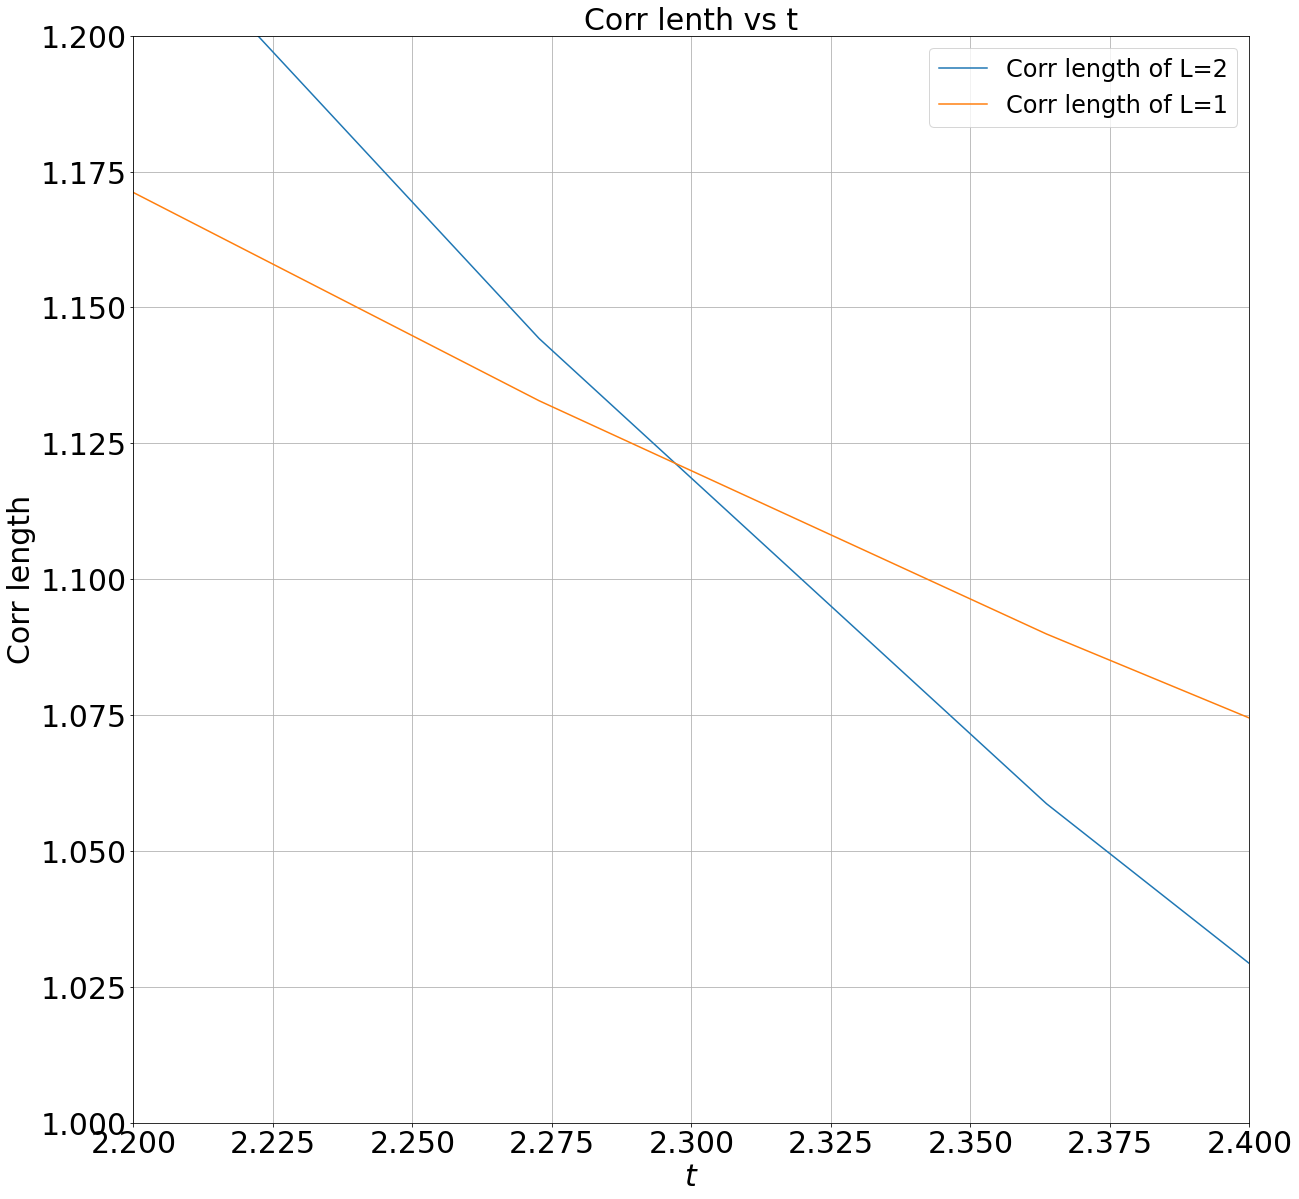

In [27]:
temperature = np.linspace(1,10,100)
xi = [ 1/np.log(np.linalg.eigvalsh(twoD(i,1,0))[3]/np.linalg.eigvalsh(twoD(i,1,0))[2])/2 for i in temperature]
plt.figure(figsize=(20,20))
plt.title("Corr lenth vs t", fontsize=30)
plt.plot(temperature, xi, label = "Corr length of L=2" )
xi = [ 1/np.log(np.linalg.eigvalsh(T(i,1,0))[1]/np.linalg.eigvalsh(T(i,1,0))[0]) for i in temperature]
plt.plot(temperature, xi, label = "Corr length of L=1" )
plt.legend(loc="best",fontsize=24)
plt.xlim(2.2,2.4)
plt.ylim(1,1.2)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("$t$",fontsize=30)
plt.ylabel("Corr length", fontsize=30)
# plt.loglog()
plt.grid()
plt.show()

# Construct transfer matrix through Tensor Methods

## Numpy Method

### 設定 M

In [28]:
t = 1
J = 1
beta = 1/t
M = np.array([[np.sqrt(math.cosh(beta*J)), np.sqrt(math.sinh(beta*J))],
                [np.sqrt(math.cosh(beta*J)),-np.sqrt(math.sinh(beta*J))]])

### 用 numpy 把 M 接成 T


In [29]:
T = np.zeros((2,2,2,2))

for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                T[i,j,k,l] = np.sum(M[:,i]*M[:,j]*M[:,k]*M[:,l])
print("T_shape",np.shape(T))
print("T",T)

# M[:,0]*M[:,1]逐項相乘

T_shape (2, 2, 2, 2)
T [[[[4.76219569 0.        ]
   [0.         3.62686041]]

  [[0.         3.62686041]
   [3.62686041 0.        ]]]


 [[[0.         3.62686041]
   [3.62686041 0.        ]]

  [[3.62686041 0.        ]
   [0.         2.76219569]]]]


### T接T

In [30]:
np_TT = np.tensordot(T,T,(1,3))
np_TT = np.transpose(np_TT,(0,3,4,1,5,2))
np_TT = np_TT.reshape((4,2,4,2))
print(np.shape(np_TT))
print("np_TT",np_TT)
np.linalg.eigh( np.trace(np_TT,axis1 = 1,axis2 =  3) )


(4, 2, 4, 2)
np_TT [[[[22.6785078   0.        ]
   [ 0.         13.15411642]
   [ 0.         17.27181901]
   [13.15411642  0.        ]]

  [[ 0.         13.15411642]
   [17.27181901  0.        ]
   [13.15411642  0.        ]
   [ 0.         13.15411642]]]


 [[[ 0.         13.15411642]
   [17.27181901  0.        ]
   [13.15411642  0.        ]
   [ 0.         13.15411642]]

  [[17.27181901  0.        ]
   [ 0.         10.01809819]
   [ 0.         13.15411642]
   [10.01809819  0.        ]]]


 [[[ 0.         17.27181901]
   [13.15411642  0.        ]
   [17.27181901  0.        ]
   [ 0.         10.01809819]]

  [[13.15411642  0.        ]
   [ 0.         13.15411642]
   [ 0.         10.01809819]
   [13.15411642  0.        ]]]


 [[[13.15411642  0.        ]
   [ 0.         13.15411642]
   [ 0.         10.01809819]
   [13.15411642  0.        ]]

  [[ 0.         13.15411642]
   [10.01809819  0.        ]
   [13.15411642  0.        ]
   [ 0.          7.62972504]]]]


(array([ 0.94512664,  0.98168436, 53.59815003, 55.67133903]),
 array([[-0.60208675, -0.        ,  0.        , -0.79843068],
        [ 0.        ,  0.70710678, -0.70710678,  0.        ],
        [ 0.        , -0.70710678, -0.70710678,  0.        ],
        [ 0.79843068,  0.        ,  0.        , -0.60208675]]))

## CYTNX Method

In [31]:
def ut_print(ut):
    ut.print_diagram()
    print(ut.get_block().numpy())

In [32]:
t=1
m = np.array([[np.sqrt(np.cosh(1/t)),np.sqrt(np.cosh(1/t))],[np.sqrt(np.sinh(1/t)),-np.sqrt(np.sinh(1/t))]])
CyT_M = cy.from_numpy(m)
Uni_M = cy.UniTensor(CyT_M, rowrank = 1)
Uni_M.print_diagram()

m_transpose = np.array([[np.sqrt(np.cosh(1/t)),np.sqrt(np.sinh(1/t))],[np.sqrt(np.cosh(1/t)),-np.sqrt(np.sinh(1/t))]])
CyT_M_transpose = cy.from_numpy(m_transpose)
Uni_M_transpose = cy.UniTensor(CyT_M_transpose, rowrank = 1)
Uni_M_transpose.print_diagram()

Uni_M_up = Uni_M.clone()
ut_print(Uni_M_up)

Uni_M_down = Uni_M_transpose.clone()
ut_print(Uni_M_down)

Uni_M_left = Uni_M.clone()
ut_print(Uni_M_left)

Uni_M_right = Uni_M_transpose.clone()
ut_print(Uni_M_right)

Uni_M_up.print_diagram()
Uni_M_down.print_diagram()
Uni_M_left.print_diagram()
Uni_M_right.print_diagram()

delta = np.zeros((2,2,2,2))
delta[0,0,0,0] = delta[1,1,1,1] = 1

Delta = cy.from_numpy(delta)
UniDelta = cy.UniTensor(Delta, rowrank = 2)

UniDelta.print_diagram()
ut_print(UniDelta)

M_network = cy.Network("UTUTT.net")
M_network.PutUniTensors(['mu','md','mr','ml','delta'], [Uni_M_up,Uni_M_down,Uni_M_right,Uni_M_left,UniDelta])
print(M_network)
Uni_T=M_network.Launch()
Uni_T.set_name("Uni_T")
CyT_T = Uni_T.get_block()
ut_print(Uni_T)

T_network = cy.Network("TT.net")
print(T_network)

T_network.PutUniTensors(['T1','T2'], [Uni_T,Uni_T])
Uni_TT=T_network.Launch()
Uni_TT.set_name("Uni_TT")
# Uni_TT.print_diagram()
ut_print(Uni_TT)

Uni_TT.combineBonds([1,4])
Uni_TT.combineBonds([2,5])
# Uni_TT.print_diagram()
ut_print(Uni_TT)

Uni_TT_trace = Uni_TT.Trace(0, 3)
ut_print(Uni_TT_trace)

cy.linalg.Eigh(Uni_TT_trace.get_block())


-----------------------
tensor Name : 
tensor Rank : 2
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         2 |____ 1  
           \             /     
            -------------      
-----------------------
tensor Name : 
tensor Rank : 2
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         2 |____ 1  
           \             /     
            -------------      
-----------------------
tensor Name : 
tensor Rank : 2
block_form  : false
is_diag     : False
on device   : cytnx device: CPU
            -------------      
           /             \     
     0 ____| 2         2 |____ 1  
           \             /     
            -------------      
[[ 1.24220797  1.24220797]
 [ 1.08406697 -1.08406697]]
-----------------------
tensor Name : 
tensor Rank : 2
block_form  : false


[, ]

### 比較 numpy 跟 Cytnx

### 比較T

In [33]:
print("Numpy Method\n",T)
print("Cytnx Method\n",Uni_T.get_block().numpy())

Numpy Method
 [[[[4.76219569 0.        ]
   [0.         3.62686041]]

  [[0.         3.62686041]
   [3.62686041 0.        ]]]


 [[[0.         3.62686041]
   [3.62686041 0.        ]]

  [[3.62686041 0.        ]
   [0.         2.76219569]]]]
Cytnx Method
 [[[[4.76219569 0.        ]
   [0.         3.62686041]]

  [[0.         3.62686041]
   [3.62686041 0.        ]]]


 [[[0.         3.62686041]
   [3.62686041 0.        ]]

  [[3.62686041 0.        ]
   [0.         2.76219569]]]]


### 比較TT

In [34]:
print("np_TT\n")
print(np_TT)
print("Uni_TT get_block\n")
print(Uni_TT.get_block())

np_TT

[[[[22.6785078   0.        ]
   [ 0.         13.15411642]
   [ 0.         17.27181901]
   [13.15411642  0.        ]]

  [[ 0.         13.15411642]
   [17.27181901  0.        ]
   [13.15411642  0.        ]
   [ 0.         13.15411642]]]


 [[[ 0.         13.15411642]
   [17.27181901  0.        ]
   [13.15411642  0.        ]
   [ 0.         13.15411642]]

  [[17.27181901  0.        ]
   [ 0.         10.01809819]
   [ 0.         13.15411642]
   [10.01809819  0.        ]]]


 [[[ 0.         17.27181901]
   [13.15411642  0.        ]
   [17.27181901  0.        ]
   [ 0.         10.01809819]]

  [[13.15411642  0.        ]
   [ 0.         13.15411642]
   [ 0.         10.01809819]
   [13.15411642  0.        ]]]


 [[[13.15411642  0.        ]
   [ 0.         13.15411642]
   [ 0.         10.01809819]
   [13.15411642  0.        ]]

  [[ 0.         13.15411642]
   [10.01809819  0.        ]
   [13.15411642  0.        ]
   [ 0.          7.62972504]]]]
Uni_TT get_block


Total elem: 64
type  : 

### 比較 TT 上下取 trace 後的 eigh

In [35]:
print("eigh check of np_TT\n")
np.linalg.eigh( np.trace(np_TT,axis1 = 1,axis2 =  3) )

eigh check of np_TT



(array([ 0.94512664,  0.98168436, 53.59815003, 55.67133903]),
 array([[-0.60208675, -0.        ,  0.        , -0.79843068],
        [ 0.        ,  0.70710678, -0.70710678,  0.        ],
        [ 0.        , -0.70710678, -0.70710678,  0.        ],
        [ 0.79843068,  0.        ,  0.        , -0.60208675]]))

In [36]:
print("eigh check of Uni_TT_trace\n")
np.linalg.eigh(Uni_TT_trace.get_block().numpy())

eigh check of Uni_TT_trace



(array([ 0.94512664,  0.98168436, 53.59815003, 55.67133903]),
 array([[ 6.02086752e-01, -5.44879012e-14,  9.97980721e-16,
          7.98430675e-01],
        [-6.39488462e-14, -7.07106781e-01,  7.07106781e-01,
         -8.88178420e-16],
        [ 6.39048998e-14,  7.07106781e-01,  7.07106781e-01,
         -8.18114997e-16],
        [-7.98430675e-01,  7.23540235e-14,  4.76606889e-16,
          6.02086752e-01]]))